In [1]:
from hypernetworks.core.Hypernetwork import Hypernetwork
from hypernetworks.core.Hypersimplex import VERTEX, ALPHA, BETA, hstype_to_str
from hypernetworks.utils.HTCompiler import load_parser, compile_hn
from hypernetworks.utils.HTTools import remove_special, is_seq
from hypernetworks.utils.HTGraph import draw_hn

from IPython.display import Image

In [2]:
hn = Hypernetwork()
parser = load_parser()

compile_hn(hn, parser, """
    x=<a1, b1, a2, b2; R_x>
    y=<a1, b1, a2, b2; R_y>
    z=<a1, b1, a2, b2; R_z>

    x -> (v_4 /above/ v_3) AND (v_3 /above/ v_2) AND (v_2 /above/ v_1);
    y -> (v_4 /above/ v_3) /next/ (v_2 /above/ v_1);
    z -> v_4 /above/ v_3 /above/ v_2 /above/ v_1;
""")

for key, rel in hn.relations.items():
    print(key, ":", rel)

x : [[{'VNAME': 4}, {'PRED': 'above'}, {'VNAME': 3}], {'PRED': 'AND'}, [[{'VNAME': 3}, {'PRED': 'above'}, {'VNAME': 2}], {'PRED': 'AND'}, [{'VNAME': 2}, {'PRED': 'above'}, {'VNAME': 1}]]]
y : [[{'VNAME': 4}, {'PRED': 'above'}, {'VNAME': 3}], {'PRED': 'next'}, [{'VNAME': 2}, {'PRED': 'above'}, {'VNAME': 1}]]
<hypernetworks.core.Hypersimplex.HsRelation object at 0x7fd3d04c20d0> : None
<hypernetworks.core.Hypersimplex.HsRelation object at 0x7fd3d04c2190> : None
<hypernetworks.core.Hypersimplex.HsRelation object at 0x7fd3d04c2250> : None
<hypernetworks.core.Hypersimplex.HsRelation object at 0x7fd3d04c2310> : None
z : [{'VNAME': 4}, {'PRED': 'above'}, [{'VNAME': 3}, {'PRED': 'above'}, [{'VNAME': 2}, {'PRED': 'above'}, {'VNAME': 1}]]]


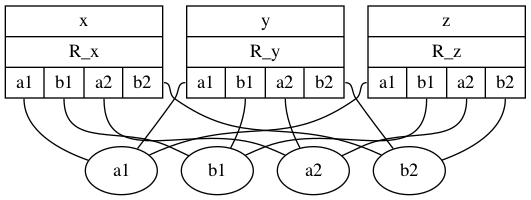

In [3]:
draw_hn(hn, fname="/tmp/hn", view=False)
Image(filename='/tmp/hn.png', width=600, height=600)